# EDA using Python 

##### Attached are two files test.csv and survival.csv
##### This is a dataset from the titanic records of passengers. Combine the databases and provide us insights on
##### a/ The survival rate - 5 marks
##### b/ what kind of passengers did not survive – 10 marks
##### c/ Show us EDA that can best explain the fate of the passenger and show us which of the variables are significant in explaining this - 25 marks


### Imports

In [80]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib


### Read Data

In [180]:
df_surv = pd.read_csv('Titanic_survival.csv')
df_test = pd.read_csv('Titanic_test.csv')

In [181]:
df_surv.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [182]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [183]:
print(df_surv.shape), print(df_test.shape)

(418, 2)
(418, 11)


(None, None)

##### Lets merge these two datasets using the common column 'PassengerId'.

In [184]:
df = pd.merge(df_test, df_surv, on='PassengerId')

In [185]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [22]:
df.shape

(418, 12)

##### Check for any missing values in the data

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [187]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In the dataset some values for Fare, Age and many values for Cabin are missing.

In [198]:
df = df.drop(labels = 'Cabin', axis = 1)

In [188]:
df["Fare"].fillna(df["Fare"].median(skipna=True), inplace=True)

Using Imputer imported from sklearn.preprocessing we are replacing the Nan values in the Age column by mean and there are a total of 86 missing values in the column.

In [203]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imp = imp.fit(df.iloc[:, 4:5])
df.iloc[:, 4:5] = imp.transform(df.iloc[:, 4:5])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [204]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [205]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.576535,0.363636
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.850103,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


##### Check for outliers

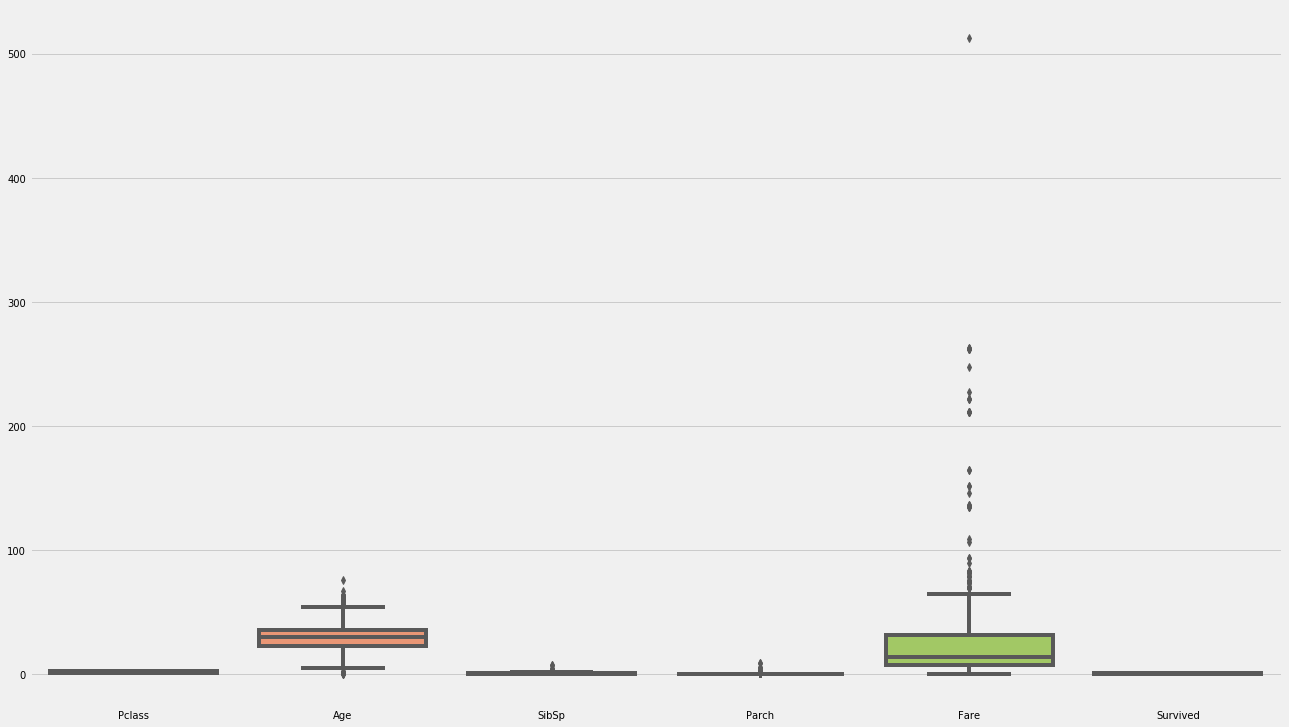

In [206]:
fig = plt.figure(figsize = (20,12))
ax = sns.boxplot(data=df.drop(labels= "PassengerId" , axis = 1), palette="Set2")

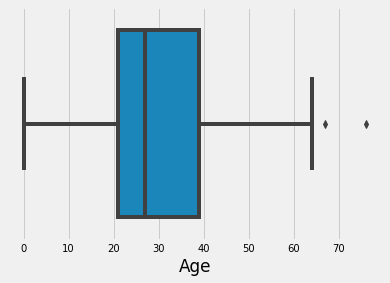

In [82]:
sns.boxplot(df.Age)

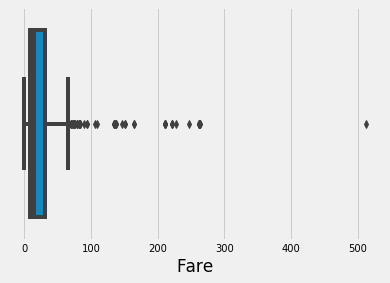

In [83]:
sns.boxplot(df.Fare)

###### We can observe few outliers in Age and many outliers in Fare

## a. The survival rate

<BarContainer object of 2 artists>

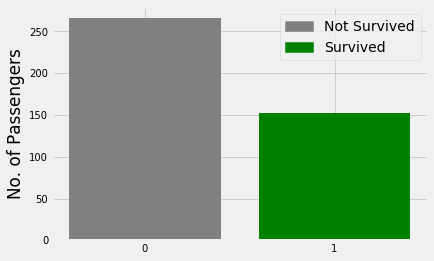

In [84]:
notSurvived = sum(df['Survived'] == 0)
survived = sum(df['Survived'] == 1)
x = np.arange(2)
gray_patch = mpatches.Patch(color='gray',label='Not Survived')
green_patch = mpatches.Patch(color='green',label='Survived')
plt.legend(handles=[gray_patch,green_patch], loc='upper right')
plt.xticks(x, list(['0','1']))
plt.ylabel('No. of Passengers')
plt.bar(x, [notSurvived,0], color = 'gray')
plt.bar(x, [0,survived], color = 'green')

In [51]:
df.groupby(["Survived"]).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,266,266,266,266,205,266,266,266,265,47,266
1,152,152,152,152,127,152,152,152,152,44,152


In [57]:
print(df.Survived.sum()/df.Survived.count())

0.36363636363636365


More people died than survived. The survival rate here is 36.3%

## b. What kind of passengers did not survive
## c. Show us EDA that can best explain the fate of the passenger and show us which of the variables are significant in explaining this 

In [58]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         male      266
1         female    152
Name: Survived, dtype: int64

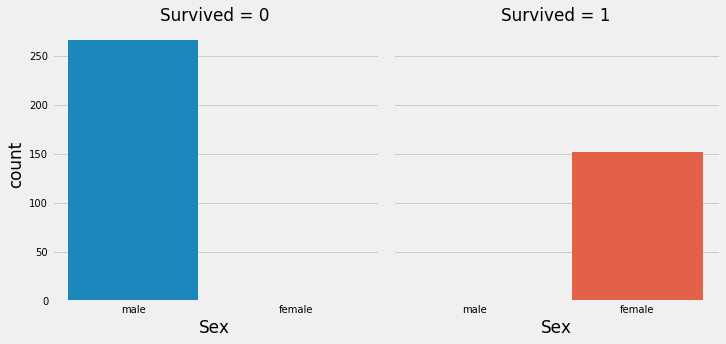

In [85]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df);

In [61]:
df[df.Survived == 1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1


In [62]:
df[df.Survived == 0].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0


In [63]:
print("% of women survived: " , df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("% of men survived:   " , df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

% of women survived:  1.0
% of men survived:    0.0


##### If we consider just the survival vs Sex, we can clearly see that all men did not survive. Whereas, all the female survived.
### Sex: Female more likely to survive than male

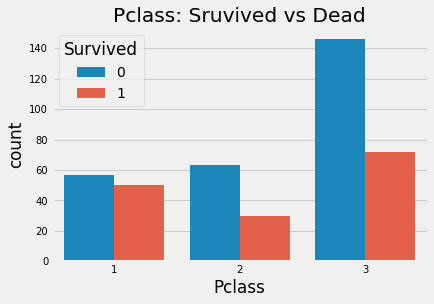

In [96]:
sns.countplot('Pclass', hue='Survived', data=df)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

In [97]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,57,50,107
2,63,30,93
3,146,72,218
All,266,152,418


In [72]:
print("% of survivals in") 
print("Pclass=1 : ", df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count())
print("Pclass=2 : ", df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count())
print("Pclass=3 : ", df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.4672897196261682
Pclass=2 :  0.3225806451612903
Pclass=3 :  0.3302752293577982


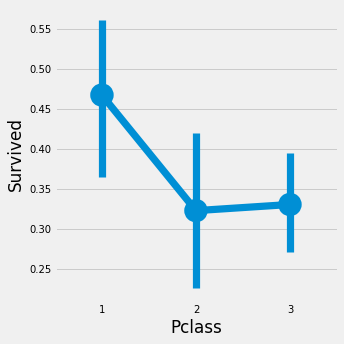

In [86]:
sns.catplot('Pclass','Survived', kind='point', data=df);

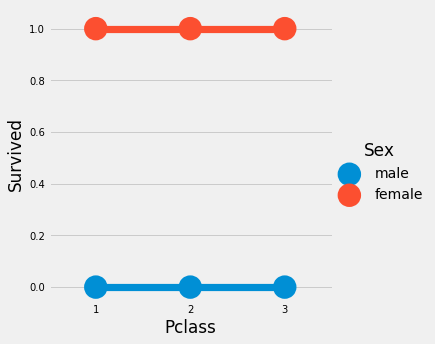

In [103]:
sns.catplot('Pclass','Survived', hue= 'Sex', kind='point', data=df)
plt.show()

##### I use FactorPlot and CrossTab here because with these plots categorical variables can easily be visualized. Looking at FactorPlot and CrossTab:
##### We can see the survival rate is the highest for people in PClass 1 and decreases significantly for PClass 2 & 3.
##### Passenger Class : Survival rate decreases with Pclass
##### All the male died across all the PClass while all the female survived across all the PClass.

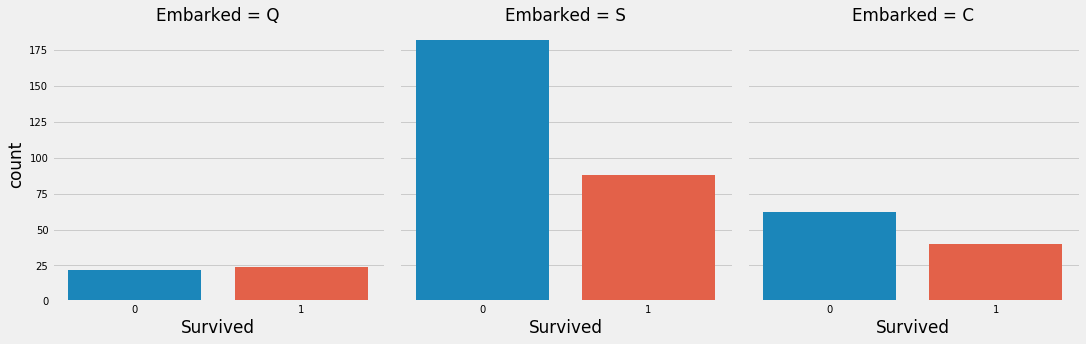

In [87]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

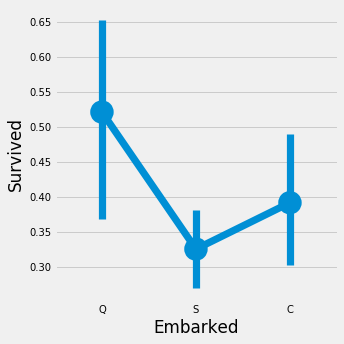

In [88]:
sns.catplot('Embarked','Survived', kind='point', data=df)
plt.show()

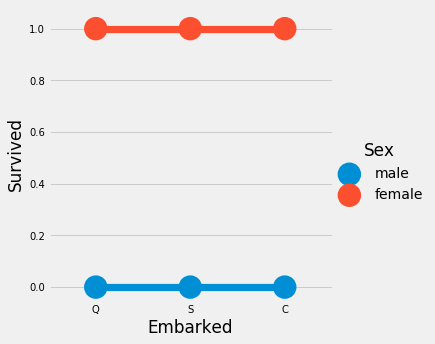

In [89]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df)
plt.show()

##### Embarked : Survival rate is the lowest for S and its highest for Q
##### Almost all male embarked at Q,S & C died, whereas all the females survived.

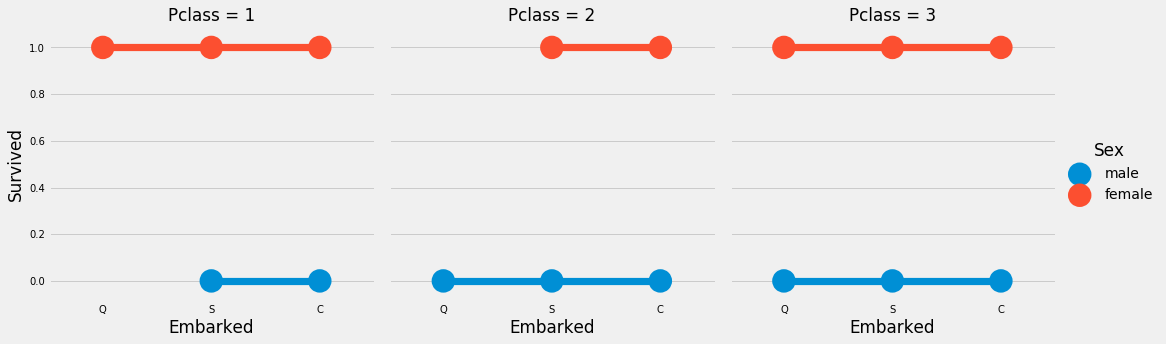

In [91]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df)
plt.show()

##### We can see that no male had boarded at Q with PClass 1 ticket, and no female had boarded at Q with PClass 2 ticket.
##### Otherwise, the story remains the same. All male people have died across all embarked points and across all the PClass. And all female have survived.

In [107]:
pd.crosstab([df.Survived], [df.Sex, df.Pclass, df.Embarked], margins=True)

Sex      female                          male                             All
Pclass        1         2      3            1      2          3              
Embarked      C  Q   S  C   S  C   Q   S    C   S  C  Q   S   C   Q    S     
Survived                                                                     
0             0  0   0  0   0  0   0   0   28  29  7  4  52  27  18  101  266
1            28  1  21  4  26  8  23  41    0   0  0  0   0   0   0    0  152
All          28  1  21  4  26  8  23  41   28  29  7  4  52  27  18  101  418


### Age as a factor

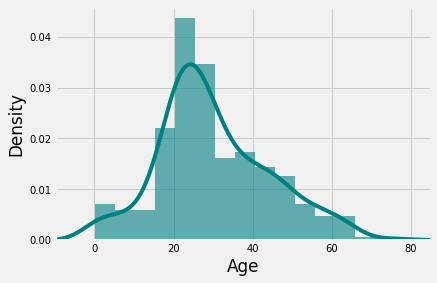

In [165]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

From the above visualization we can see that passengers in the age range of 25-30 hold a greater percentage when compared to the other age groups.

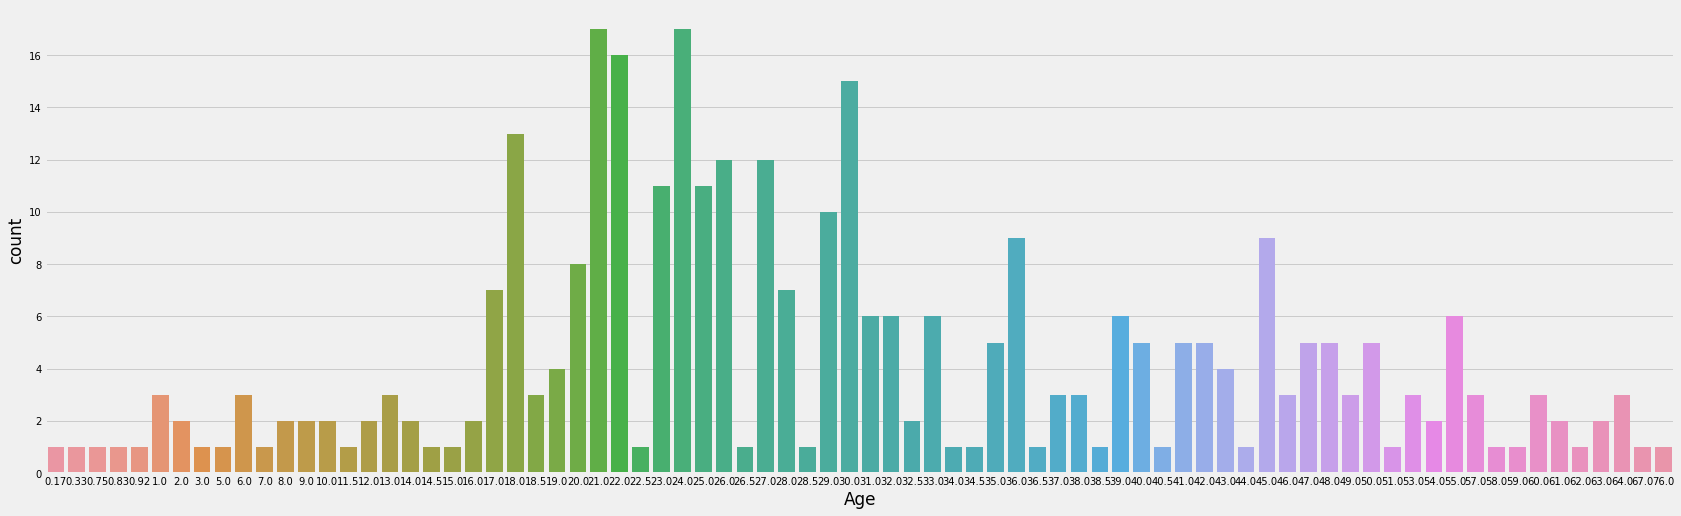

In [164]:
plt.figure(figsize=(26,8))
ax = sns.countplot(df.Age)

##### Let's create bins to see the age distribution more clearly

In [128]:
#Age
bins = (0,15,30,60,100)
group_names = ['Kids','Young', 'Middle_aged', 'Old']
df['Age_bin'] = pd.cut(df['Age'], bins = bins, labels = group_names)

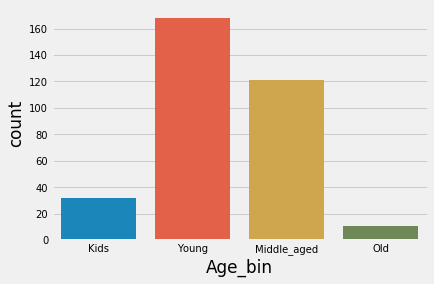

In [130]:
sns.countplot(df.Age_bin)

##### We can see that the majority of the people are either Young or Middle_aged. Very few Old people are on the ship.

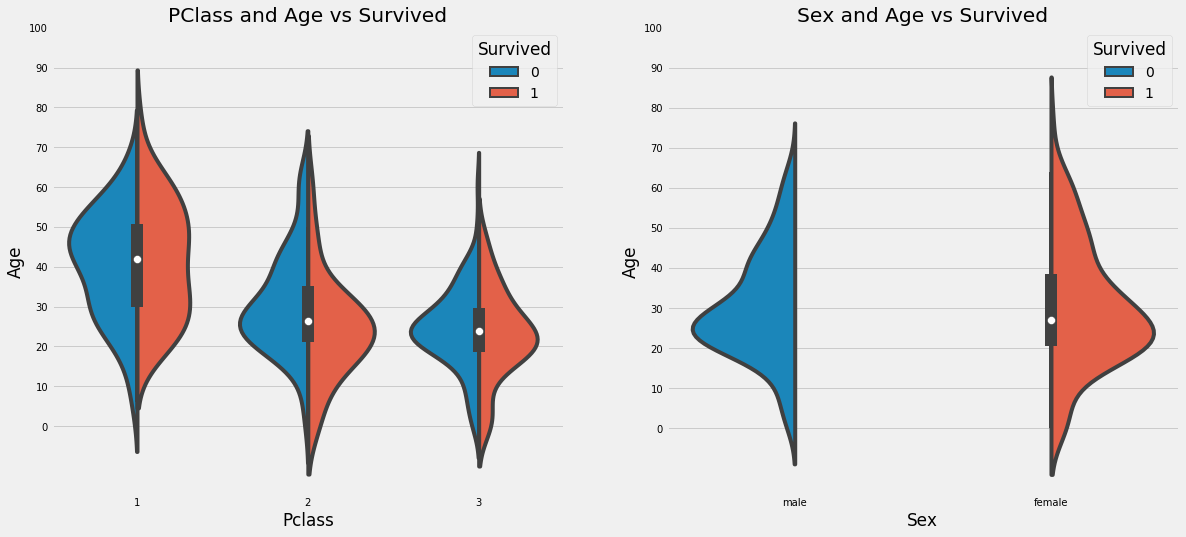

In [131]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

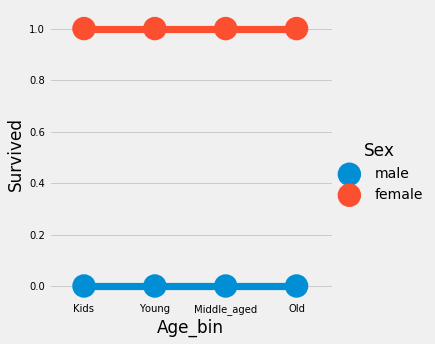

In [141]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data=df)
plt.show()

##### We can see that people who are mid aged had higher survival rate.
##### Even across all the age groups - males haven't survived, whereas females have survived.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


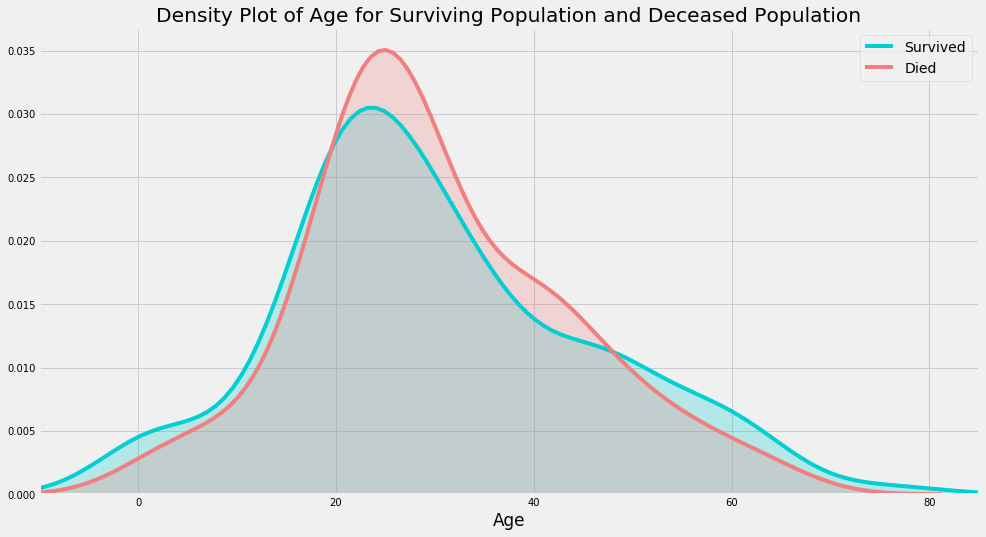

In [159]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

From the above visualization we can deduce that there were more deceased passengers under the age group 20-40.
The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children and older people. The passengers evidently made an attempt to save children and elderly people by giving them a place on the life rafts.

### SibSp & Parch as a factor

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


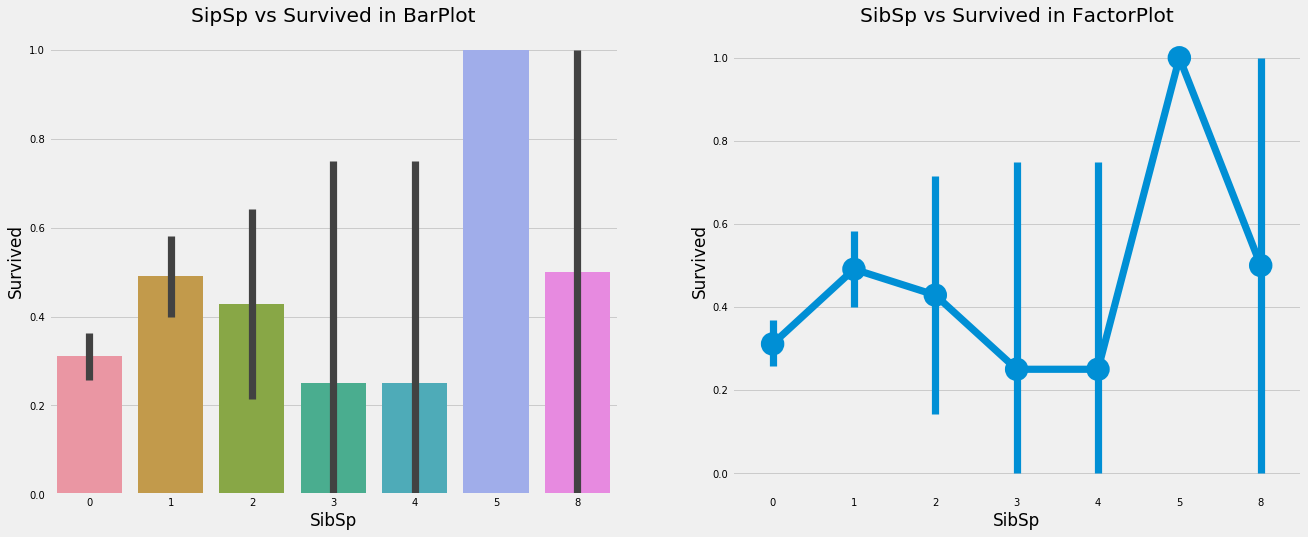

In [137]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived', data=df,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('SibSp','Survived', data=df,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

##### We can see that people who had more siblings & spouse(i.e. 5 or 6) had higher survival rate.
##### Passengers who had less siblings & spouse(i.e. between 0 & 4) had very less survival rate.

In [139]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,61,62,160
1,42,27,41
2,3,4,7
3,1,0,3
4,0,0,4
5,0,0,1
8,0,0,2


In [144]:
pd.crosstab([df.Sex, df.Survived], [df.SibSp, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Females having Siblings and spouse 0 and 1 and having Pclass tickets of Class3 were high in survival.

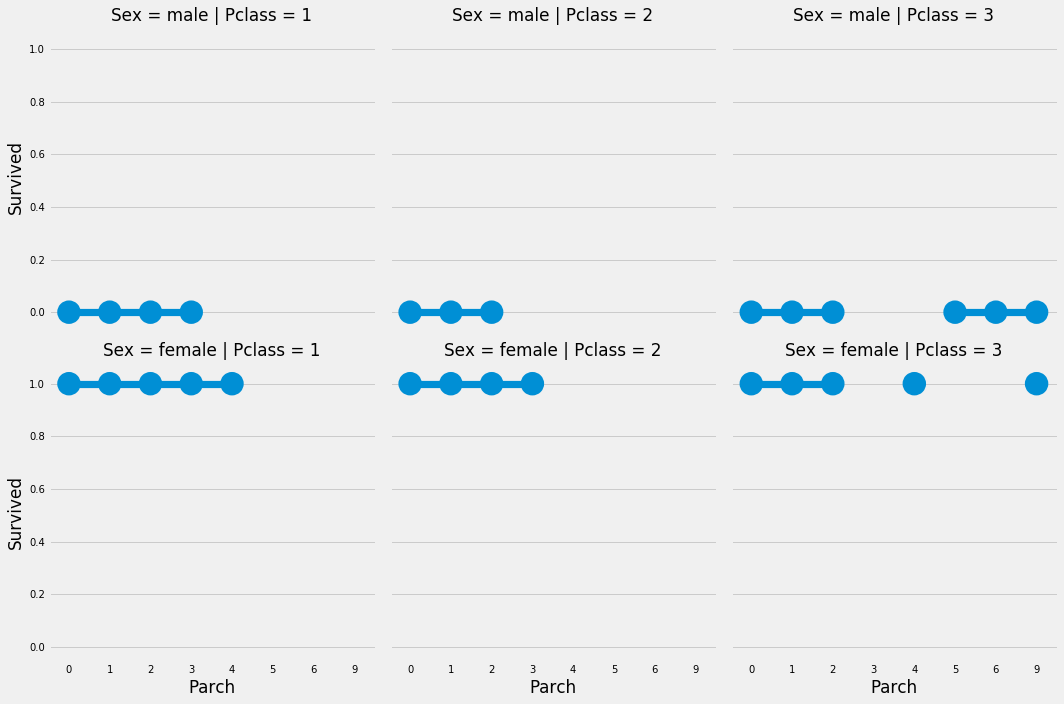

In [145]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=df)
plt.show()

##### All males having Partners & children died. All females having partners & children survived.

In [146]:
pd.crosstab([df.Sex, df.Survived], [df.Parch, df.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

### Fare wise distributon

In [154]:
df = df[pd.notnull(df['Fare'])]

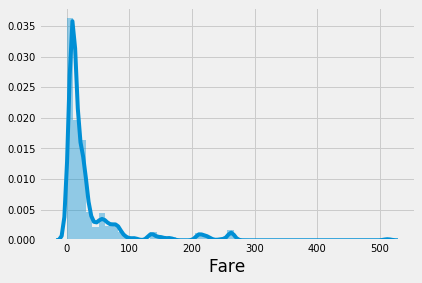

In [155]:
sns.distplot(df['Fare'])
plt.show()


#### Density Plot of Fare for Surviving Population and Deceased Population

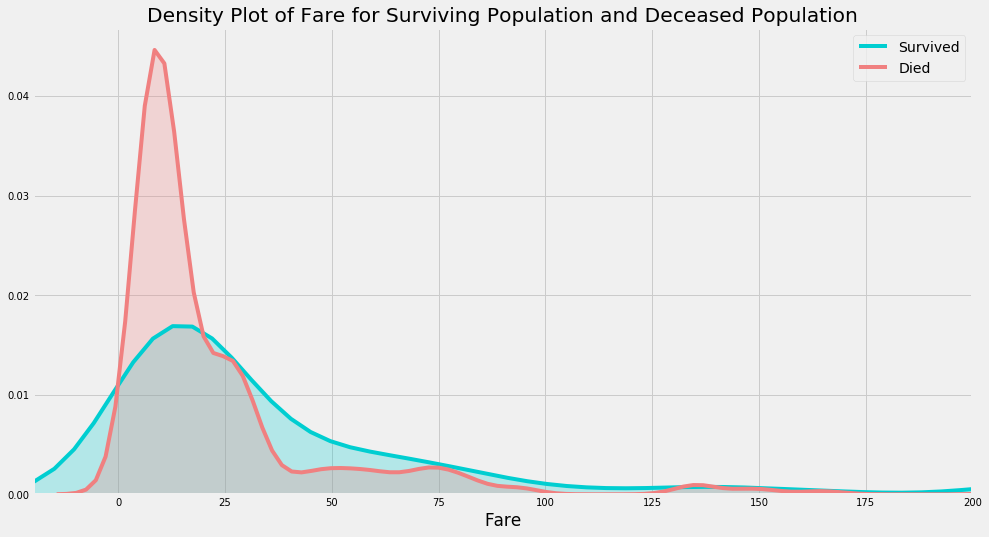

In [160]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Fare"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Fare"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

##### We can see that people whose fare was less in the bracket of 0-40 died the most. 

### Class wise survived and deceased population.

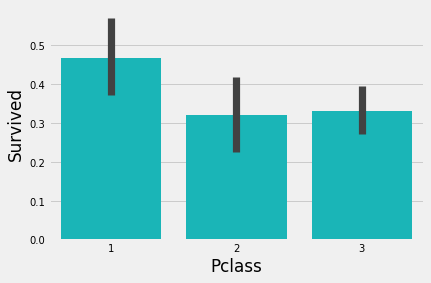

In [161]:
sns.barplot('Pclass', 'Survived', data=df, color="darkturquoise")
plt.show()